In [1]:
%notebook inline

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



In [3]:
import urllib, cStringIO
from PIL import Image

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from get_point_history import pget
from point_history import getmes
from get_point_map import get

In [5]:
from IPython.display import HTML, display

In [6]:
import matplotlib.dates as mdates

In [7]:
import pandas as pd
import pickle
import folium
from folium import plugins

In [8]:
from grid import *
from dep import *

In [9]:
from scipy.ndimage import imread

In [10]:
from netCDF4 import Dataset

In [11]:
from mpl_toolkits.basemap import Basemap, shiftgrid

In [12]:
import itertools

In [154]:
%matplotlib notebook

In [14]:
import matplotlib
matplotlib.style.use('ggplot')

In [15]:
import datetime

In [16]:
date=datetime.datetime(2016,1,11,0)

In [17]:
ids=[1630,1706,819,1449,1461,100080,1741,1721,938,100062,1500,1862,1841,1848,1843,1855,1858,1851,100083,100084,1844,100085,1866,1452,2003,2001,1463,2361,100086,100088,1889,100094,2367,1440,100091,100092,100093,1870,1846,1847]

# MEDITERRANEAN SEA STORM SURGE BULLETIN

In [18]:
print datetime.datetime.strftime(date,'%d %b %Y %H:%M')

11 Jan 2016 00:00


In [19]:
print 'Issued {} AM UTC and valid for the next 72 h'.format(datetime.datetime.strftime(datetime.datetime.utcnow(),'%d %b %Y %I:%M'))

Issued 03 Oct 2016 07:57 AM UTC and valid for the next 72 h


In [20]:
#first graph

In [103]:
date=datetime.datetime(2016,10,1,0)

In [104]:
tdate=datetime.datetime.strftime(date,"%Y%m%d%H")
tdate24=datetime.datetime.strftime(date+datetime.timedelta(days=1),"%Y%m%d%H")
tdate48=datetime.datetime.strftime(date+datetime.timedelta(days=2),"%Y%m%d%H")
tdate72=datetime.datetime.strftime(date+datetime.timedelta(days=3),"%Y%m%d%H")

In [105]:
fdate=datetime.datetime.strftime(date,"%Y%m%d.%H")
fdate24=datetime.datetime.strftime(date+datetime.timedelta(days=1),"%Y%m%d.%H")
fdate48=datetime.datetime.strftime(date+datetime.timedelta(days=2),"%Y%m%d.%H")
fdate72=datetime.datetime.strftime(date+datetime.timedelta(days=3),"%Y%m%d.%H")

In [106]:
date=datetime.datetime(2016,1,11,0)

In [136]:
OFILE='../DELFT3D/SeaLevelBuoys2.csv'

In [141]:
OFILE='../DELFT3D/SeaLevelDbDevices2.csv'

In [142]:
obs=pd.read_csv(OFILE,encoding = 'utf8',engine='python')

In [143]:
obs.columns=np.append('ID',obs.columns[1:])

In [144]:
obs=obs.set_index('ID')

In [145]:
obs.head()

,lat,lon,name,status,country,location
ID,,,,,,
2071,52.933998,1.302000,Cromer,active,Spain,NaN
2068,53.867779,8.717500,Cuxhaven,active,Spain,NaN
2072,46.158943,-1.219317,La Rochelle - La Pallice,active,Spain,NaN
2069,60.154003,-1.140381,Lerwick,active,Spain,NaN
2067,54.085335,-4.766917,Port Erin,active,Spain,NaN


In [146]:
obs[['lat','lon']] = obs[['lat','lon']].apply(pd.to_numeric)

In [147]:
mapa = folium.Map(location=[39, 18], zoom_start=4)

In [148]:
for i in range(len(ids)):
    try:
        folium.Marker(obs.xs(ids[i])[['lat','lon']].values.astype(float), popup=obs.xs(ids[i])['name']).add_to(mapa)
    except:
        pass

In [31]:
#mapa.create_map('tmp/test.html')

In [149]:
mapa

In [33]:
min_lon=-5.5
max_lon=43.
min_lat=28.5
max_lat=47.5

In [34]:
%%skip
mapa.add_children(plugins.ImageOverlay(dimage,opacity=1,bounds=[[min_lat, min_lon], [max_lat, max_lon]]))
mapa

In [35]:
url2='http://oiswww.eumetsat.org/IPPS/html/latestImages/EUMETSAT_MSG_IR108EColor-centralEurope.jpg'
url3='http://oiswww.eumetsat.org/IPPS/html/latestImages/EUMETSAT_MSG_RGB-naturalcolor-centralEurope.jpg'

In [36]:
%%skip
file2= cStringIO.StringIO(urllib.urlopen(url2).read())
file3= cStringIO.StringIO(urllib.urlopen(url3).read())
img2=Image.open(file2)
img3=Image.open(file3)
fig, axes = plt.subplots(ncols=2, figsize=(12,5))
axes[0].imshow(img2)
axes[0].axis('off')
axes[0].set_title('METEOSAT(EUMETSAT)')
axes[1].imshow(img3)
axes[1].axis('off')

plt.figtext(.12, .12,'Meteosat 0 degree, Channels, IR 10.8', size=15)
plt.figtext(.55,.12,'Meteosat 0 degree, RGB Composite, Natural Colors', size=15)

In [37]:
image_list='<table><tr><td><img src={} style="height="770px"; width="550px"; object-fit: contain"></td><td><img src={} style="height="770px"; width="550px"; object-fit: contain"></td></tr></table>'.format(url2,url3)

METEOSAT(EUMETSAT)

In [38]:
display(HTML(image_list))

,


In [39]:
print '{}                         {}'.format('Meteosat 0 degree, Channels, IR 10.8' ,  'Meteosat 0 degree, RGB Composite, Natural Colors')

Meteosat 0 degree, Channels, IR 10.8                         Meteosat 0 degree, RGB Composite, Natural Colors


In [107]:
url4='https://apps.ecmwf.int/plots/product-download/medium/public_plots/?time={},0,{}&parameter=Wind%20850%20and%20mslp&area=Europe&token=c81fef1f1cb0f267d31e72f30545129e&email=gbreyiannis@gmail.com'.format(tdate,tdate)

In [108]:
url5='https://apps.ecmwf.int/plots/product-download/medium/public_plots/?time={},24,{}&parameter=Wind%20850%20and%20mslp&area=Europe&token=c81fef1f1cb0f267d31e72f30545129e&email=gbreyiannis@gmail.com'.format(tdate,tdate24)

In [109]:
dl1=urllib.urlretrieve(url4,filename='tmp/e0.png')

In [110]:
dl2=urllib.urlretrieve(url5,filename='tmp/e24.png')

METEOROLOGIC ANALYSIS (ECMWF )

The wind speed indicated is the 850hPa isobaric surface, which is around 1.5km above sea level

In [111]:
image_list='<table><tr><td><img src={}></td><td><img src={}></td></tr></table>'.format(url4,url5)

In [112]:
display(HTML(image_list))

,


In [44]:
print '{}                                                {}'.format('Analysis Time 0','Forecast 24h')

Analysis Time 0                                                Forecast 24h


In [113]:
url6='https://apps.ecmwf.int/plots/product-download/medium/public_plots/?time={},48,{}&parameter=Wind%20850%20and%20mslp&area=Europe&token=c81fef1f1cb0f267d31e72f30545129e&email=gbreyiannis@gmail.com'.format(tdate,tdate48)

In [114]:
url7='https://apps.ecmwf.int/plots/product-download/medium/public_plots/?time={},72,{}&parameter=Wind%20850%20and%20mslp&area=Europe&token=c81fef1f1cb0f267d31e72f30545129e&email=gbreyiannis@gmail.com'.format(tdate,tdate72)

In [115]:
dl3=urllib.urlretrieve(url6,filename='tmp/e48.png')

In [116]:
dl4=urllib.urlretrieve(url7,filename='tmp/e72.png')

In [117]:
image_list='<table><tr><td><img src={}></td><td><img src={}></td></tr></table>'.format(url6,url7)

In [118]:
display(HTML(image_list))

,


In [49]:
print '{}                                                {}'.format('Forecast 48h','Forecast 72h')

Forecast 48h                                                Forecast 72h


In [162]:
url_1 = 'http://www.mareografico.it/DATA/Ginostra.jpg'
dl5=urllib.urlretrieve(url_1,filename='tmp/ginostra.png')

In [164]:
url_2='http://www.webcam.comune.genova.it/images_out/current.jpg'
dl6=urllib.urlretrieve(url_2,filename='tmp/genova.png')

In [165]:
url_3='http://93.62.201.235/maree/WEBCAM/smarcoweb2.jpg'
dl7=urllib.urlretrieve(url_3,filename='tmp/venice.png')

In [50]:
#rdate=datetime.datetime(date.year, date.month, date.day)

In [51]:
path='/mnt/rmdisk/2016N/'

In [52]:
basename='med'

In [53]:
ppath=path+'{}/{}/{:02d}/'.format(date.month,date.day,date.hour)

In [54]:
# read grid and bath
grid = Grid.fromfile(ppath+basename+'.grd')
deb0=Dep.read(ppath+basename+'.dep',grid.shape)
w=np.isnan(deb0.val).T

In [55]:
with open(ppath+basename+'.pkl', 'r') as f:
    ptr=pickle.load(f)

In [56]:
date10=date-datetime.timedelta(days=10)

datetime.datetime(2016, 1, 1, 0, 0)

In [57]:
fdate10=datetime.datetime.strftime(date10,"%Y%m%d.%H")

'20160111.00'

In [58]:
#read the netCDF file
try:
        d = Dataset(ppath+'trim-'+basename+'.nc')
        h=d.variables['S1'][:,:,:]
        u=d.variables['WINDU'][:,:,:]
        v=d.variables['WINDV'][:,:,:]
        time=d.variables['time'][:]
        lons=d.variables['XCOR'][:]
        lats=d.variables['YCOR'][:]
        xz=d.variables['XZ'][1:-1,1:-1] # center of cells for h excluding surrounding box
        yz=d.variables['YZ'][1:-1,1:-1]
        tstamp=[]
        for l in time : tstamp.append(date+datetime.timedelta(0,int(l)))
except Exception as e:
    print e


In [59]:
minlon=lons.min()
maxlon=lons.max()
minlat=lats.min()
maxlat=lats.max()

In [60]:
m = Basemap(projection='cyl',llcrnrlat=minlat,urcrnrlat=maxlat,\
             llcrnrlon=minlon,urcrnrlon=maxlon,resolution='l')


In [61]:
parallels = np.arange(-90.,90,20.)
meridians = np.arange(0.,360.,20.)

In [62]:
#maximum height for all hours
hmax=np.amax(h,axis=0)

In [63]:
fig = plt.figure(figsize=(12,6))
mhmax=np.ma.masked_array(hmax[1:-1,1:-1],w[1:-1,1:-1]) # mask height
CS1 = m.contour(xz,yz,mhmax,10,linewidths=0.5,colors='k',animated=True)
CS2 = m.contourf(xz,yz,mhmax,10,cmap=plt.cm.RdBu_r,animated=True)
cb = m.colorbar(CS2,"right", size="5%", pad="2%")
cb.set_label('m')
plt.tight_layout()
m.drawcoastlines(linewidth=1.5)
m.drawcountries()
#m.drawparallels(parallels)
#m.drawmeridians(meridians)

plt.savefig('tmp/hmax.png')

In [64]:
for i in range(0,u.shape[0],24):
    fig = plt.figure(figsize=(12,6))
    vel=np.sqrt(u[i,:,:]**2+v[i,:,:]**2)
    mvel=np.ma.masked_array(vel,w) # mask total velocity
    CS1 = m.contour(lons,lats,mvel,10,linewidths=0.5,colors='k',animated=True)
    CS2 = m.contourf(lons,lats,mvel,10,cmap=plt.cm.RdBu_r,animated=True)
    cb = m.colorbar(CS2,"right", size="5%", pad="2%")
    cb.set_label('m/s')
    mu=np.ma.masked_array(u[i,:,:],w) # mask velocities
    mv=np.ma.masked_array(v[i,:,:],w)
    Q = m.quiver(lons[::20,::20],lats[::20,::20],mu[::20,::20],mv[::20,::20])#,scale=200)
    qk = plt.quiverkey(Q, 0.1, 0.1, 20, '20 m/s', labelpos='W')
    plt.tight_layout()
    m.drawcoastlines(linewidth=1.5)
    m.drawcountries()
#m.drawparallels(parallels)
#m.drawmeridians(meridians)

    plt.savefig('tmp/w{}.png'.format(i))

In [119]:
image_list='<table><tr><td><img src={}></td><td><img src={}></td></tr></table>'.format('tmp/w0.png','tmp/w24.png')

WIND IMPOSED
The wind speed here is 10 m height wind and is the quantity imposed to the sea surface

In [120]:
display(HTML(image_list))

,


In [67]:
print '{}                         {}'.format('Wind Speed at sea level at time 0 h', 'Wind Speed at sea level at time 24 h')

Wind Speed at sea level at time 0 h                         Wind Speed at sea level at time 24 h


In [121]:
image_list='<table><tr><td><img src={}></td><td><img src={}></td></tr></table>'.format('tmp/w48.png','tmp/w72.png')

In [122]:
display(HTML(image_list))

,


In [70]:
print '{}                         {}'.format('Wind Speed at sea level at time 48 h', 'Wind Speed at sea level at time 72 h')

Wind Speed at sea level at time 48 h                         Wind Speed at sea level at time 72 h


SEA LEVEL EVOLUTION

In [71]:
for i in range(0,u.shape[0],24):
    fig = plt.figure(figsize=(12,6))
    mh=np.ma.masked_array(h[i,1:-1,1:-1],w[1:-1,1:-1]) # mask height
    CS1 = m.contour(xz,yz,mh,10,linewidths=0.5,colors='k',animated=True)
    CS2 = m.contourf(xz,yz,mh,10,cmap=plt.cm.RdBu_r,animated=True)
    cb = m.colorbar(CS2,"right", size="5%", pad="2%")
    cb.set_label('m')
    plt.tight_layout()
    m.drawcoastlines(linewidth=1.5)
    m.drawcountries()
#m.drawparallels(parallels)
#m.drawmeridians(meridians)

    plt.savefig('tmp/h{}.png'.format(i))

In [72]:
image_list='<table><tr><td><img src={}></td><td><img src={}></td></tr></table>'.format('tmp/h0.png','tmp/h24.png')

In [73]:
display(HTML(image_list))

,


In [74]:
print '{}                                 {}'.format('Sea Level Height at time 0 h','Sea Level Height at time 24 h')

Sea Level Height at time 0 h                                 Sea Level Height at time 24 h


In [75]:
image_list='<table><tr><td><img src={}></td><td><img src={}></td></tr></table>'.format('tmp/h48.png','tmp/h72.png')

In [76]:
display(HTML(image_list))

,


In [77]:
print '{}                                 {}'.format('Sea Level Height at time 48 h','Sea Level Height at time 72 h')

Sea Level Height at time 48 h                                 Sea Level Height at time 72 h


In [80]:
#get data
tota=[]
for n in ids:
    #print n
    t,s,plat,plon,bname,bid = getmes(date10,date,n)
    dic0={'t_gauge':t, 'sh':[a for [a,b,c] in s], 'tide':[b for [a,b,c] in s], 'ss':[c for [a,b,c] in s]}
    data0=pd.DataFrame(dic0)
    data0=data0.set_index('t_gauge')
    try:
        hcw,hw=pget(fdate10,fdate,path,basename,ptr[n])
        #hcw,hw=get(fdate,fdate,path,basename,plat,plon)
    except:
        hw=np.empty(np.size(t))
        hw.fill(np.nan)
        hcw=t
    dic2={'t_his':hcw, 's_his':hw}
    data2=pd.DataFrame.from_dict(dic2)
    data2=data2.set_index('t_his')
    data0=data0.join(data2, how='outer')
    tota.append(data0)

In [123]:
tota=pd.concat(tota, keys=ids)

In [88]:
#tota.head()

In [124]:
tota[['sh','tide','ss','s_his']] = tota[['sh','tide','ss','s_his']].apply(pd.to_numeric)

In [125]:
tota.xs(ids[1]).plot()

In [126]:
def plotf(i):
    try:
        ax=tota.xs(np.int(i))[['sh','ss','tide']].dropna().apply(pd.to_numeric).plot(style=['r-','g-','b-'])
        tota.xs(np.int(i))[['s_his']].dropna().apply(pd.to_numeric).plot(ax=ax, style=['k-'])
    except:
        tota.xs(np.int(i))[['s_his']].dropna().apply(pd.to_numeric).plot(style=['k-'])

In [127]:
plotf(ids[1])

In [ ]:
#data0.plot(subplots=True)

In [129]:
def fplot(ax,sat,col):
    ax.plot_date(sat.index,sat,'-')
#    ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0,24,12)))
#    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M\n%d-%b'))
    ax.xaxis.grid(True, which="minor")
   # ax.yaxis.grid()
#    ax.xaxis.set_major_locator(mdates.MonthLocator())
#    ax.xaxis.set_major_formatter(mdates.DateFormatter('\n\n%Y'))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))

    return ax

In [132]:
len(ids)

40

In [150]:
for i in range(len(ids)):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    fplot(ax,tota.xs(ids[i])['ss'].dropna(),'ss')
    fplot(ax,tota.xs(ids[i])['s_his'].dropna(),'s_his')
    plt.legend()
    ax.set_title(obs.xs(ids[i])['name'])
    ax.set_ylim(-.5,0.75)#np.max([0.75,idat[['ss','s_his']].max().max()]))
    ax.set_xlim(date10,date+datetime.timedelta(days=3))
    ax.set_ylabel('Height (m)')
    fig.savefig('tmp/g{}.png'.format(i))

## SEA LEVEL STORM SURGE MEASUREMENTS AND MODELLING ESTIMATES

WEST MEDITERRANEAN SEA : SPAIN AND FRANCE

In [155]:
#%%skip
a=np.arange(4)
b=np.arange(2)
glist=[]
for r in itertools.product(a,b): glist.append((r[0],r[1]))

<IPython.core.display.Javascript object>


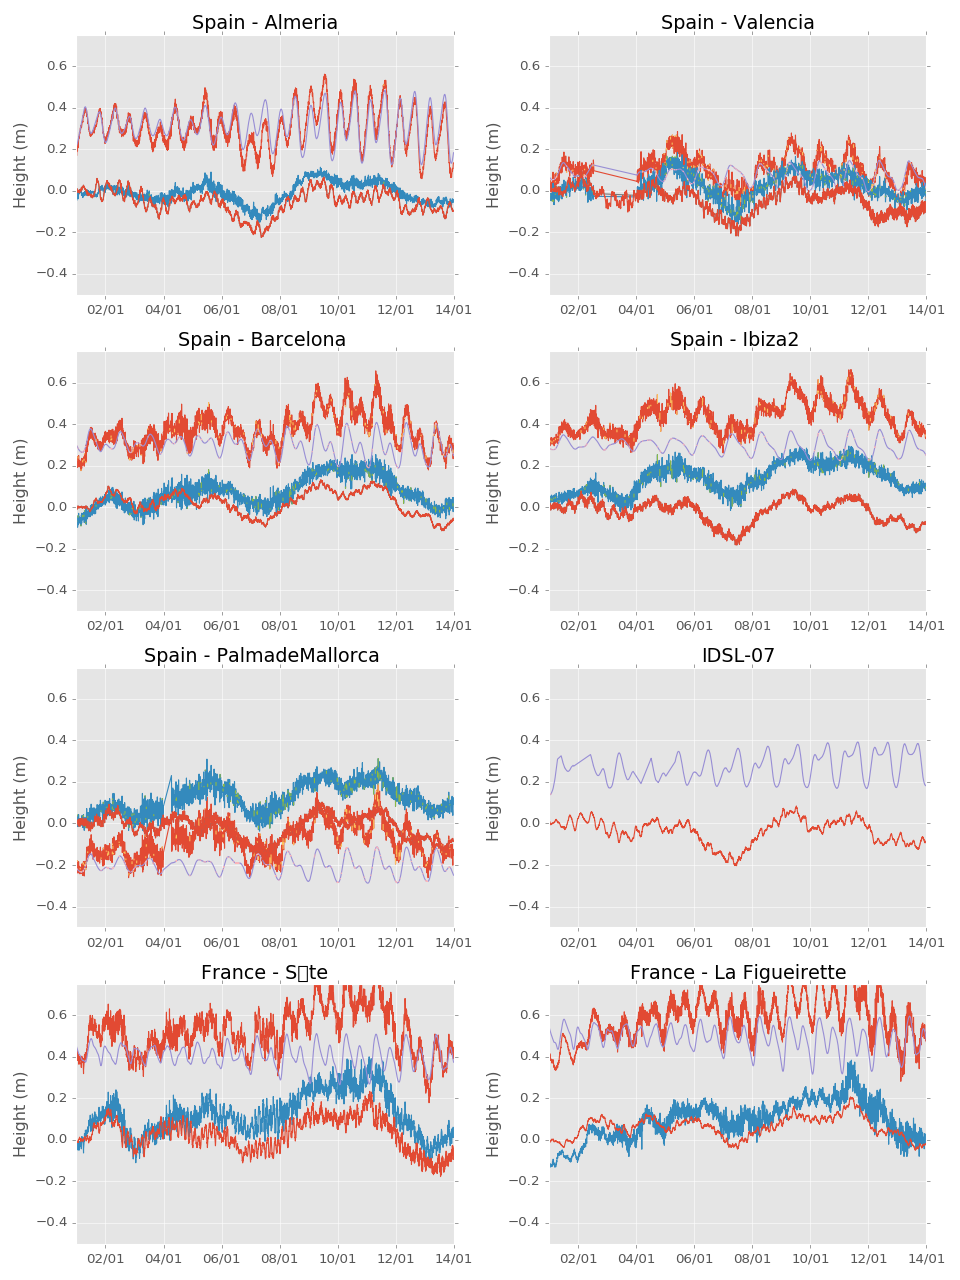

In [156]:
#%%skip
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,16) )
for i,val in enumerate(ids[:8]):
    idat=tota.xs(val)
    smask=np.isfinite(idat['ss'])
    shmask=np.isfinite(idat)['s_his']
    try:
        axes[glist[i]]=fplot(axes[glist[i]], idat[smask], 'ss')
    except Exception as e:
        print e
        pass    
    try:
        axes[glist[i]]=fplot(axes[glist[i]],idat[shmask], 's_his')
    except Exception as e:
        print e
        pass
    
    axes[glist[i]].set_title(obs.xs(val)['name'])
    axes[glist[i]].set_ylim(-.5,0.75)#np.max([0.75,idat[['ss','s_his']].max().max()]))
    axes[glist[i]].set_xlim(date10,date+datetime.timedelta(days=3))
    axes[glist[i]].set_ylabel('Height (m)')
fig.tight_layout()

In [ ]:
%%skip
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,16) )
for i,val in enumerate(ids[:8]):
    idat=tota.xs(val)
    smask=np.isfinite(idat['ss'])
    shmask=np.isfinite(idat)['s_his']
    try:
        idat['s_his'][shmask].plot(ax=axes[glist[i]],title=obs.xs(val)['name'], legend=None, ylim=[-.5,np.max([0.75,idat.max().max()])])
        axes[glist[i]].set_ylabel('height')
    except:
        pass
    try:
        idat['ss'][smask].plot(ax=axes[glist[i]], title=obs.xs(val)['name'], legend=None, ylim=[-.5,np.max([0.75,idat.max().max()])])
        shmask=np.isfinite(idat)['s_his']
    except:
        pass

#   axes[glist[i]]
fig.tight_layout()

SOUTH - WEST MEDITERRANEAN SEA : SPAIN , MOROCCO

In [157]:
glist1=(0,1)

<IPython.core.display.Javascript object>


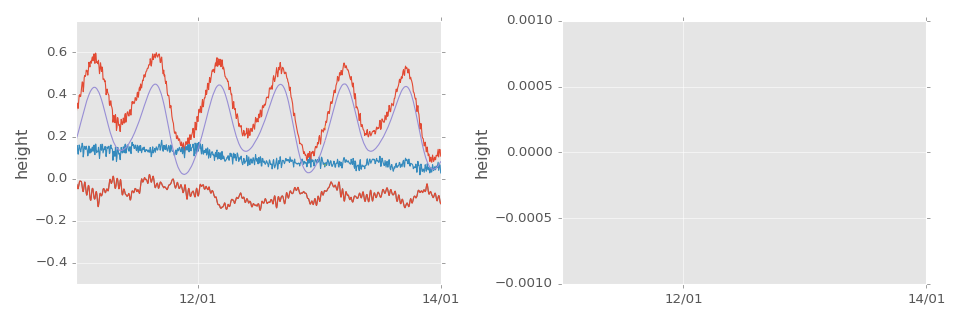

In [158]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4) )
for i,val in enumerate(ids[8:10]):
    idat=tota.xs(val)
    smask=np.isfinite(idat['ss'])
    shmask=np.isfinite(idat)['s_his']
    try:
        axes[glist1[i]]=fplot(axes[glist1[i]], idat[smask], 'ss')
   #     axes[glist1[i]].set_title(obs.xs(val)['name'])
        axes[glist1[i]].set_ylim(-.5,np.max([0.75,idat.max().max()]))
        axes[glist1[i]].set_xlim(date,date+datetime.timedelta(days=3))
    except Exception as e:
        print e
        pass    
    try:
        axes[glist1[i]]=fplot(axes[glist1[i]],idat[shmask], 's_his')
    #    axes[glist1[i]].set_title(obs.xs(val)['name'])
        axes[glist1[i]].set_ylim(-.5,np.max([0.75,idat[['ss','s_his']].max().max()]))
        axes[glist1[i]].set_xlim(date,date+datetime.timedelta(days=3))
    except Exception as e:
        print e
        pass
    axes[glist1[i]].set_ylabel('height')
fig.tight_layout()

In [103]:
%%skip
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4) )
for i,val in enumerate(ids[8:10]):
    idat=tota.xs(val)
    smask=np.isfinite(idat['ss'])
    shmask=np.isfinite(idat)['s_his']
    try:
        idat['ss'][smask].plot(ax=axes[glist1[i]],title=obs.xs(val)['name'], legend=None, ylim=[-.5,np.max([0.75,idat.max().max()])])
    except:
        pass    
    try:
        idat['s_his'][shmask].plot(ax=axes[glist1[i]],title=obs.xs(val)['name'], legend=None, ylim=[-.5,np.max([0.75,idat.max().max()])])
        axes[glist1[i]].set_ylabel('height')
    except:
        pass
fig.tight_layout()

In [159]:
a=np.arange(8)
b=np.arange(2)
glist2=[]
for r in itertools.product(a,b): glist2.append((r[0],r[1]))

<IPython.core.display.Javascript object>


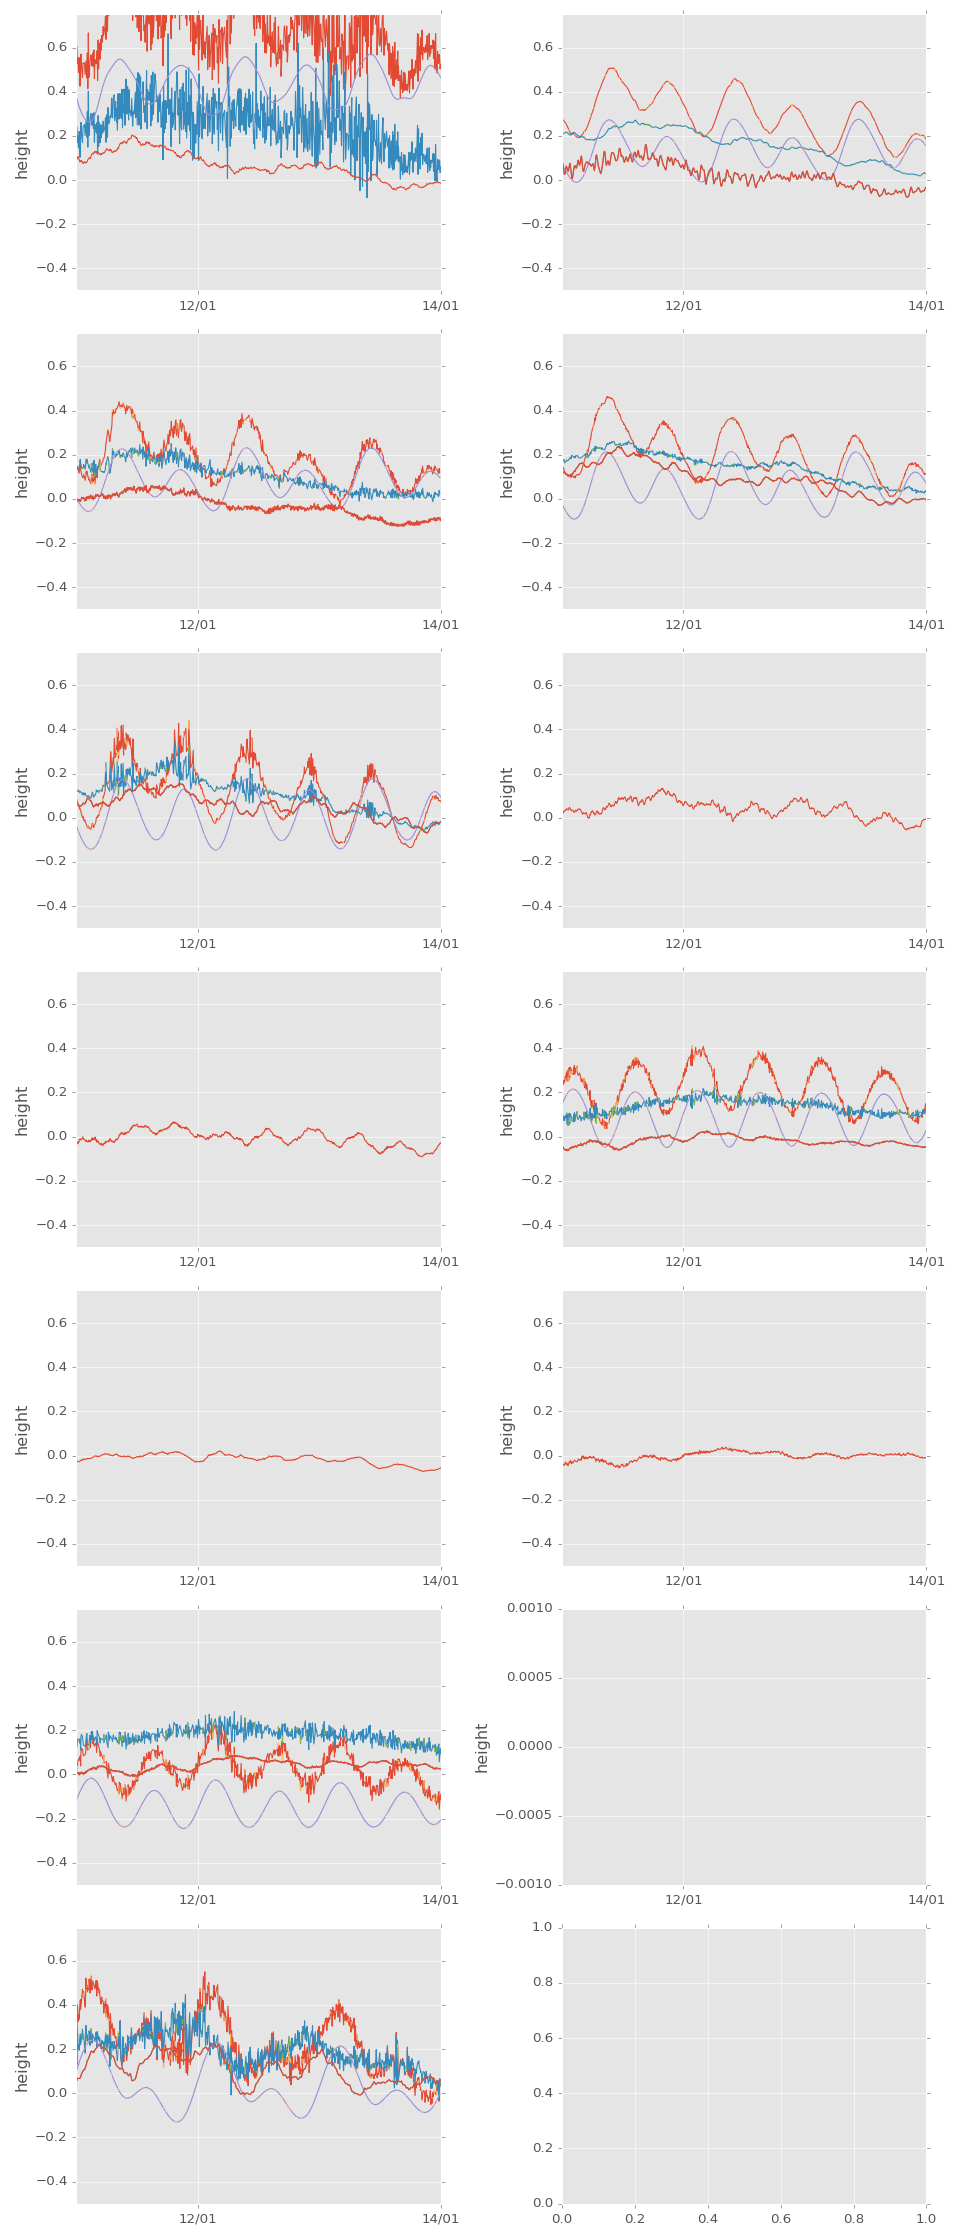

In [160]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(12,28) )
for i,val in enumerate(ids[10:23]):
    idat=tota.xs(val)
    smask=np.isfinite(idat['ss'])
    shmask=np.isfinite(idat)['s_his']
    try:
        axes[glist2[i]]=fplot(axes[glist2[i]], idat[smask], 'ss')
    except Exception as e:
        print e
        pass    
    try:
        axes[glist2[i]]=fplot(axes[glist2[i]],idat[shmask], 's_his')
    except Exception as e:
        print e
        pass
    
#    axes[glist2[i]].set_title(obs.xs(val)['name'])
    axes[glist2[i]].set_ylim(-.5,np.max([0.75,idat[['ss','s_his']].max().max()]))
    axes[glist2[i]].set_xlim(date,date+datetime.timedelta(days=3))
    axes[glist2[i]].set_ylabel('height')
    
fig.tight_layout()

In [106]:
%%skip
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(12,16) )
for i,val in enumerate(ids[10:26]):
    idat=tota.xs(val)
    smask=np.isfinite(idat['ss'])
    shmask=np.isfinite(idat)['s_his']
    try:
        idat['ss'][smask].plot(ax=axes[glist2[i]], title=obs.xs(val)['name'], legend=None, ylim=[-.5,np.max([0.75,idat.max().max()])])
        shmask=np.isfinite(idat)['s_his']
    except:
        pass
    try:
        idat['s_his'][shmask].plot(ax=axes[glist2[i]], title=obs.xs(val)['name'], legend=None, ylim=[-.5,np.max([0.75,idat.max().max()])])
        axes[glist2[i]].set_ylabel('height')
    except:
        pass
    axes[glist2[i]]
fig.tight_layout()

<IPython.core.display.Javascript object>


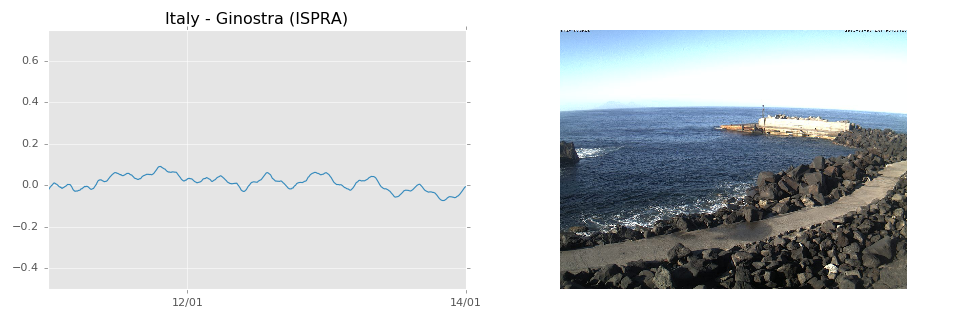

In [107]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4) )
val=1847
idat=tota.xs(val)
smask=np.isfinite(idat['ss'])
shmask=np.isfinite(idat)['s_his']
try:
        axes[0]=fplot(axes[0], idat[smask], 'ss')
except:
        pass    
try:
        axes[0]=fplot(axes[0], idat[shmask], 's_his')
except:
        pass
    
axes[0].set_title(obs.xs(val)['name'])
axes[0].set_ylim(-.5,np.max([0.75,idat[['ss','s_his']].max().max()]))
axes[0].set_xlim(date,date+datetime.timedelta(days=3))

url_ = 'http://www.mareografico.it/DATA/Ginostra.jpg'
file_= cStringIO.StringIO(urllib.urlopen(url_).read())
img_=Image.open(file_)
axes[1]=plt.imshow(img_)
axes[1]=plt.axis('off')

fig.tight_layout()

<IPython.core.display.Javascript object>


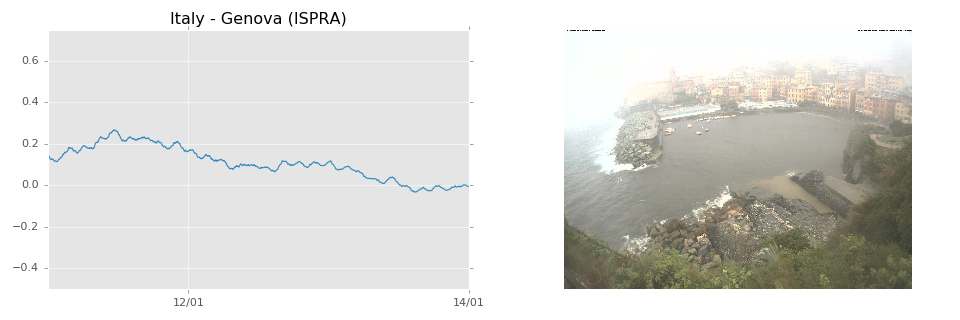

In [108]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4) )
val=1846
idat=tota.xs(val)
smask=np.isfinite(idat['ss'])
shmask=np.isfinite(idat)['s_his']

try:
        axes[0]=fplot(axes[0], idat[smask], 'ss')
except:
        pass    
try:
        axes[0]=fplot(axes[0], idat[shmask], 's_his')
except:
        pass
    
axes[0].set_title(obs.xs(val)['name'])
axes[0].set_ylim(-.5,np.max([0.75,idat[['ss','s_his']].max().max()]))
axes[0].set_xlim(date,date+datetime.timedelta(days=3))

url_ = ' http://www.webcam.comune.genova.it/images_out/current.jpg'
file_= cStringIO.StringIO(urllib.urlopen(url_).read())
img_=Image.open(file_)
axes[1]=plt.imshow(img_)
axes[1]=plt.axis('off')

fig.tight_layout()

<IPython.core.display.Javascript object>


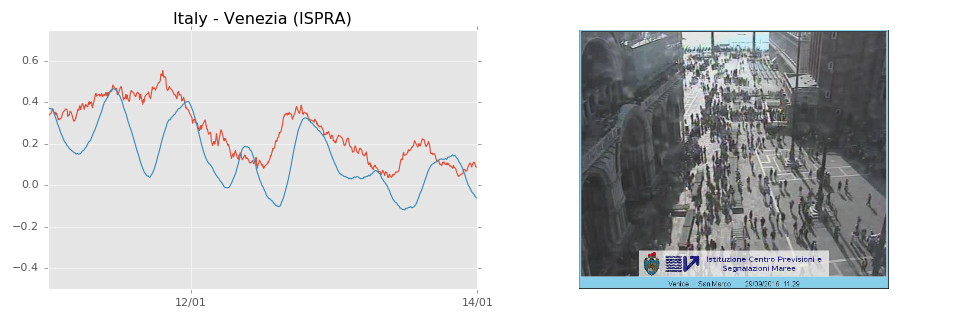

In [109]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4) )
val=1870
idat=tota.xs(val)
smask=np.isfinite(idat['ss'])
shmask=np.isfinite(idat)['s_his']
try:
        axes[0]=fplot(axes[0], idat[smask], 'ss')
except:
        pass    
try:
        axes[0]=fplot(axes[0], idat[shmask], 's_his')
except:
        pass
    
axes[0].set_title(obs.xs(val)['name'])
axes[0].set_ylim(-.5,np.max([0.75,idat[['ss','s_his']].max().max()]))
axes[0].set_xlim(date,date+datetime.timedelta(days=3))

url_ = ' http://93.62.201.235/maree/WEBCAM/smarcoweb2.jpg'
file_= cStringIO.StringIO(urllib.urlopen(url_).read())
img_=Image.open(file_)
axes[1]=plt.imshow(img_)
axes[1]=plt.axis('off')

fig.tight_layout()

EAST MEDITERRANEAN SEA : GREECE , CYPRUS AND TURKEY

In [110]:
a=np.arange(4)
b=np.arange(2)
glist3=[]
for r in itertools.product(a,b): glist3.append((r[0],r[1]))

<IPython.core.display.Javascript object>


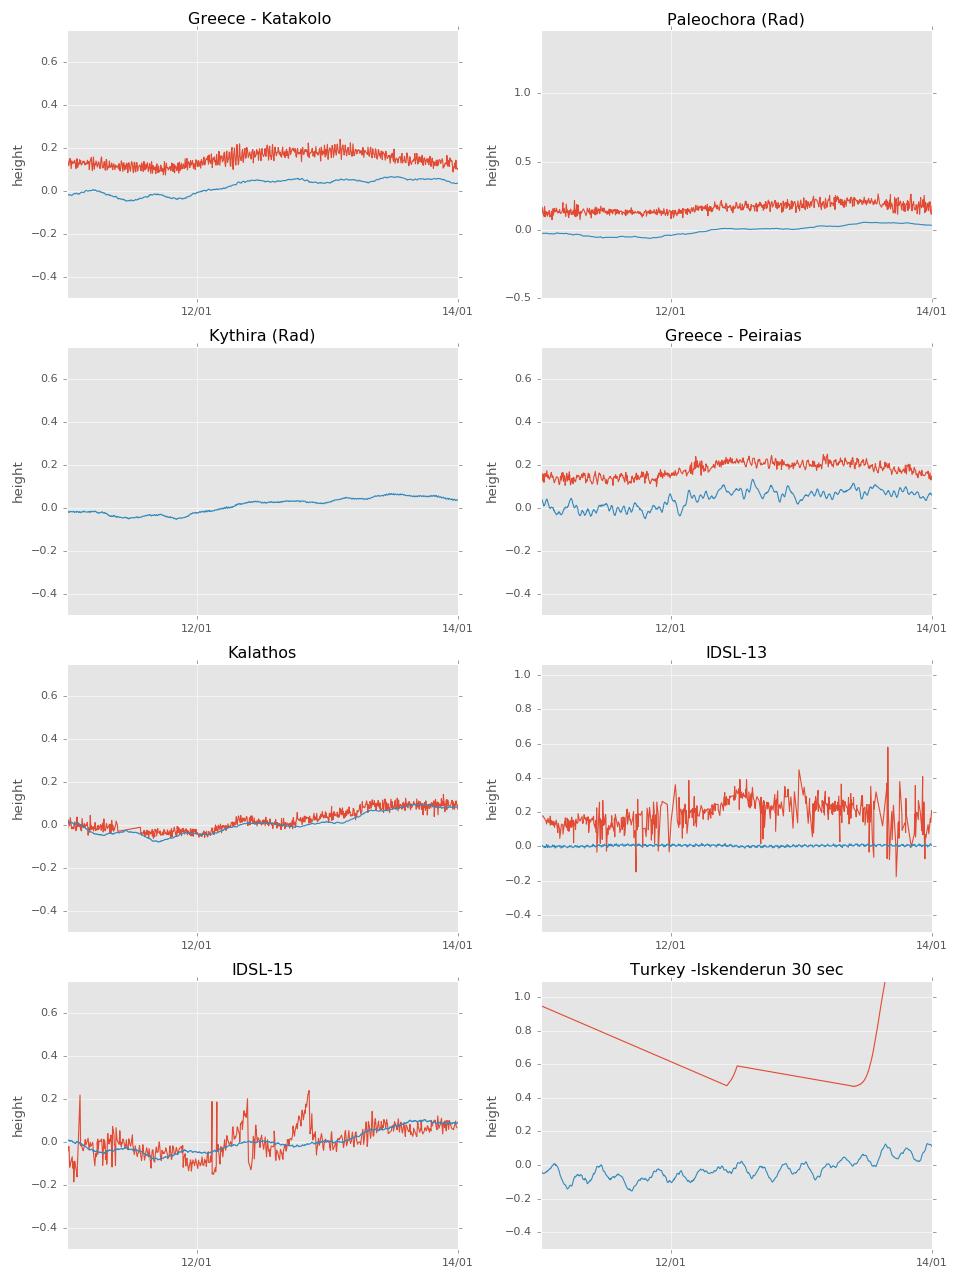

In [111]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,16) )
for i,val in enumerate(ids[23:31]):
    idat=tota.xs(val)
    smask=np.isfinite(idat['ss'])
    shmask=np.isfinite(idat)['s_his']
    try:
        axes[glist3[i]]=fplot(axes[glist3[i]], idat[smask], 'ss')
    except Exception as e:
        print e
        pass    
    try:
        axes[glist3[i]]=fplot(axes[glist3[i]],idat[shmask], 's_his')
    except Exception as e:
        print e
        pass
    
    axes[glist3[i]].set_title(obs.xs(val)['name'])
    axes[glist3[i]].set_ylim(-.5,np.max([0.75,idat[['ss','s_his']].max().max()]))
    axes[glist3[i]].set_xlim(date,date+datetime.timedelta(days=3))
    axes[glist3[i]].set_ylabel('height')
fig.tight_layout()

In [112]:
%%skip
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,16) )
for i,val in enumerate(ids[26:34]):
    idat=tota.xs(val)
    smask=np.isfinite(idat['ss'])
    shmask=np.isfinite(idat)['s_his']
    try:
        idat['ss'][smask].plot(ax=axes[glist3[i]], title=obs.xs(val)['name'], legend=None, ylim=[-.5,np.max([0.75,idat.max().max()])])
        shmask=np.isfinite(idat)['s_his']
    except:
        pass
    try:
        idat['s_his'][shmask].plot(ax=axes[glist3[i]], title=obs.xs(val)['name'], legend=None, ylim=[-.5,np.max([0.75,idat.max().max()])])
        axes[glist3[i]].set_ylabel('height')
    except:
        pass
    axes[glist3[i]]
fig.tight_layout()

MIDDLE EAST : LEBANON , ISRAEL AND EGYPT

In [113]:
a=np.arange(2)
b=np.arange(2)
glist4=[]
for r in itertools.product(a,b): glist4.append((r[0],r[1]))

<IPython.core.display.Javascript object>


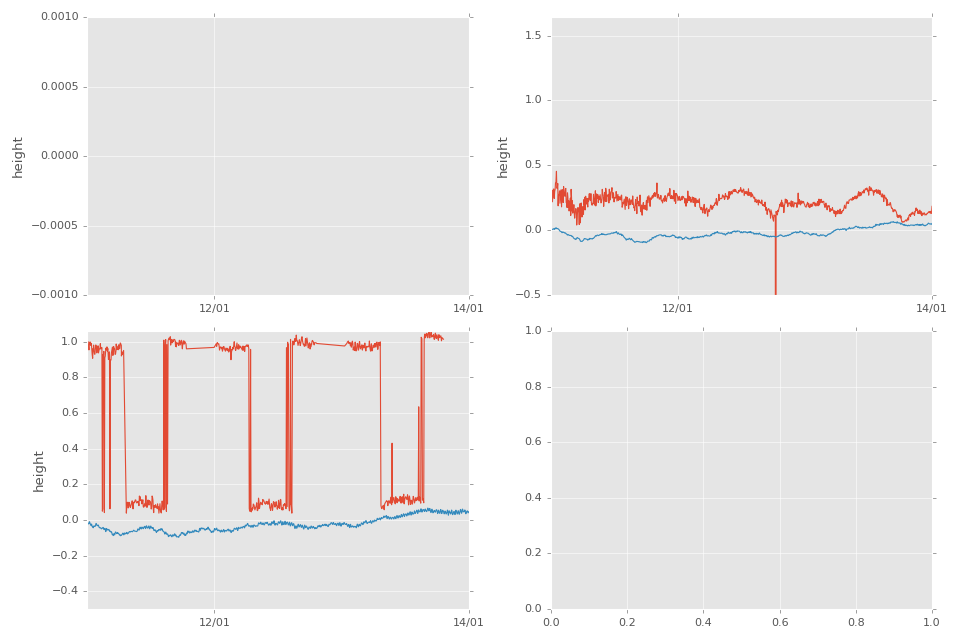

In [114]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8) )
for i,val in enumerate(ids[31:34]):
    idat=tota.xs(val)
    smask=np.isfinite(idat['ss'])
    shmask=np.isfinite(idat)['s_his']
    try:
        axes[glist4[i]]=fplot(axes[glist4[i]], idat[smask], 'ss')
    except Exception as e:
        print e
        pass    
    try:
        axes[glist4[i]]=fplot(axes[glist4[i]],idat[shmask], 's_his')
    except Exception as e:
        print e
        pass
    
#    axes[glist4[i]].set_title(obs.xs(val)['name'])
    axes[glist4[i]].set_ylim(-.5,np.max([0.75,idat[['ss','s_his']].max().max()]))
    axes[glist4[i]].set_xlim(date,date+datetime.timedelta(days=3))
    axes[glist4[i]].set_ylabel('height')
fig.tight_layout()

In [115]:
%%skip
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8) )
for i,val in enumerate(ids[34:37]):
    idat=tota.xs(val)
    smask=np.isfinite(idat['ss'])
    shmask=np.isfinite(idat)['s_his']
    try:
        idat['ss'][smask].plot(ax=axes[glist4[i]], title=obs.xs(val)['name'], legend=None, ylim=[-.5,np.max([0.75,idat.max().max()])])
        shmask=np.isfinite(idat)['s_his']
    except:
        pass
    try:
        idat['s_his'][shmask].plot(ax=axes[glist3[i]], title=obs.xs(val)['name'], legend=None, ylim=[-.5,np.max([0.75,idat.max().max()])])
        axes[glist4[i]].set_ylabel('height')
    except:
        pass
    axes[glist4[i]]
fig.tight_layout()

BLACK SEA

In [116]:
a=np.arange(2)
b=np.arange(2)
glist5=[]
for r in itertools.product(a,b): glist5.append((r[0],r[1]))

<IPython.core.display.Javascript object>


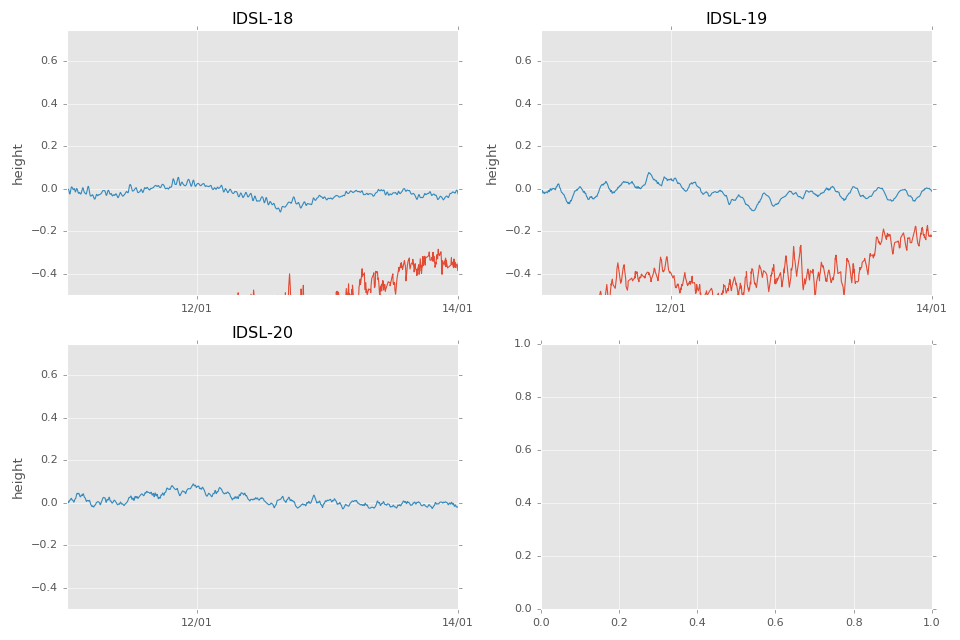

In [117]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8) )
for i,val in enumerate(ids[34:37]):
    idat=tota.xs(val)
    smask=np.isfinite(idat['ss'])
    shmask=np.isfinite(idat)['s_his']
    try:
        axes[glist5[i]]=fplot(axes[glist5[i]], idat[smask], 'ss')
    except Exception as e:
        print e
        pass    
    try:
        axes[glist5[i]]=fplot(axes[glist5[i]],idat[shmask], 's_his')
    except Exception as e:
        print e
        pass
    
    axes[glist5[i]].set_title(obs.xs(val)['name'])
    axes[glist5[i]].set_ylim(-.5,np.max([0.75,idat[['ss','s_his']].max().max()]))
    axes[glist5[i]].set_xlim(date,date+datetime.timedelta(days=3))    
    axes[glist5[i]].set_ylabel('height')
fig.tight_layout()

In [118]:
%%skip
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8) )
for i,val in enumerate(ids[37:40]):
    idat=tota.xs(val)
    smask=np.isfinite(idat['ss'])
    shmask=np.isfinite(idat)['s_his']
    try:
        idat['ss'][smask].plot(ax=axes[glist5[i]], title=obs.xs(val)['name'], legend=None, ylim=[-.5,np.max([0.75,idat.max().max()])])
        shmask=np.isfinite(idat)['s_his']
    except:
        pass
    try:
        idat['s_his'][shmask].plot(ax=axes[glist5[i]], title=obs.xs(val)['name'], legend=None, ylim=[-.5,np.max([0.75,idat.max().max()])])
        axes[glist5[i]].set_ylabel('height')
    except:
        pass
    axes[glist5[i]]
fig.tight_layout()

## REFERENCES:

Measured data from National Centres, Estimation from Joint Research Centre (JRC) based on
Meteorological Forecasts from European Centre for Medium Weather Forecast (ECMWF) and
using the DELTARES-DELFT3D Flow code.

European Centre for Medium Weather Forecast (ECMWF) data: http://www.ecmwf.int/

DELTARES: https://www.deltares.nl/en/

DELFT3D: https://oss.deltares.nl/web/delft3d

EUMETSAT: http://oiswww.eumetsat.org/IPPS/html/latestImages/EUMETSAT_MSG_IR108EColor-centralEurope.jpg

Webcam in Ginostra, Stromboli Island, by Istituto Superiore per la Protezione e la Ricerca Ambientale: http://www.mareografico.it/DATA/Ginostra.jpg

Webcam in Genova Nervi, the small harbour, by Comune di Genova: http://www.webcam.comune.genova.it/images_out/current.jpg

Webcam in Venezia, Piazza San Marco, by Istitutuzione Centro Previsione e Segnalazione Maree: http://93.62.201.235/maree/WEBCAM/smarcoweb2.jpg

Webcam in Palma de Mallorca, http://www.helios-hotels.com/mallorca/en/webcam-can-pastilla-beach.htm

In [ ]:
### CHECK

In [ ]:
%%skip
html_string = '''
<html>
    <head>
        <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.1/css/bootstrap.min.css">
        <style>body{ margin:0 100; background:whitesmoke; }</style>
    </head>
    <body>
        <h1>2014 technology and CPG stock prices</h1>

        <!-- *** Section 1 *** --->
        <h2>Section 1: Apple Inc. (AAPL) stock in 2014</h2>
        <iframe width="1000" height="550" frameborder="0" seamless="seamless" scrolling="no" \
src='http://tsunami.jrc.it/ECMWF/2016/FIX_MED_SEA/calc_20160707.00/OUT_TIF_H_48.jpg'?width=800&height=550"></iframe>
        <p>Apple stock price rose steadily through 2014.</p>
        
        <!-- *** Section 2 *** --->
        <h2>Section 2: AAPL compared to other 2014 stocks</h2>
        <iframe width="1000" height="1000" frameborder="0" seamless="seamless" scrolling="no" \
src='http://tsunami.jrc.it/ECMWF/2016/FIX_MED_SEA/calc_20160707.00/OUT_TIF_H_72.jpg'?width=1000&height=1000"></iframe>
        <p>GE had the most predictable stock price in 2014. IBM had the highest mean stock price. \
The red lines are kernel density estimations of each stock price - the peak of each red lines \
corresponds to its mean stock price for 2014 on the x axis.</p>
    </body>
</html>'''

In [ ]:
%%skip
f = open('tmp/report.html','w')
f.write(html_string)
f.close()
